<h3>Increasing dataset size to expand target labels for thyroid disease classification using ML &data sampling methods</h3>
Data Sampling Methods of SMOTE & Borderline SMOTE are used  

Performance metrics  
- Increase target classes from 5 to 7  
- Retain model performance metrics on sampled data   



**Initial dataset analysis and preprocessing to recreate model**
- Target classes with at least 230 samples are chosen for analysis   
- 400 'no condition' samples are used for class balancing  
 

In [602]:
import pandas as pd 
df = pd.read_csv('/Users/doctorflu/Desktop/disease_pred/datasets/thyroidDF.csv')
df00 = df #source dataset
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
print (df.head().to_string(index= False))
print (f'Shape of original dataset is {df00.shape} ')


 age sex on_thyroxine query_on_thyroxine on_antithyroid_meds sick pregnant thyroid_surgery I131_treatment query_hypothyroid query_hyperthyroid lithium goitre tumor hypopituitary psych TSH_measured  TSH T3_measured  T3 TT4_measured   TT4 T4U_measured  T4U FTI_measured  FTI TBG_measured  TBG referral_source target  patient_id
  29   F            f                  f                   f    f        f               f              f                 t                  f       f      f     f             f     f            t  0.3           f NaN            f   NaN            f  NaN            f  NaN            f  NaN           other      -   840801013
  29   F            f                  f                   f    f        f               f              f                 f                  f       f      f     f             f     f            t  1.6           t 1.9            t 128.0            f  NaN            f  NaN            f  NaN           other      -   840801014
  41   F            f 

In [603]:
count = df['target'].value_counts()
df1 = count[count > 230].index #choosing target classes with over 230 samples 
print (f'The selected target classes for initial analysis are {df1}')
print (f'The counts of all target classes in initial dataset is \n{count}')

The selected target classes for initial analysis are Index(['-', 'K', 'G', 'I', 'F'], dtype='object')
The counts of all target classes in initial dataset is 
-      6771
K       436
G       359
I       346
F       233
R       196
A       147
L       115
M       111
N       110
S        85
GK       49
AK       46
J        30
B        21
MK       16
Q        14
O        14
C|I      12
KJ       11
GI       10
H|K       8
D         8
FK        6
C         6
P         5
MI        2
LJ        1
GKJ       1
OI        1
D|R       1
E         1
Name: target, dtype: int64


In [604]:
target_labels_org = {
    '-'  : 'Normal',
    'K' :  'concurrent non-thyroidal illness',
    'G' : 'compensated hypothyroid',
    'I'  : 'increased binding protein',
    'F'  : 'primary hypothyroid'
}

target_labels = {
    '-'  : 'Normal',
    'K' :  'concurrent non-thyroidal illness',
    'G' : 'compensated hypothyroid',
    'I'  : 'increased binding protein',
    'F'  : 'primary hypothyroid',
    'R' : 'discordant assay results',
    'A' : 'hyperthyroid'
}

df_t = df[df['target'].isin(df1)] #dataframe containing only target label classes
df_t = df_t[df_t['target'] != '-'] #removing all normal samples


In [605]:
indices1 = df[df['target'] == '-'].index

def rand_select(x):
    return pd.Series(x).sample(n=400, random_state=1) #randomly selecting 400 'no condition' data points and saving them

In [606]:
df1 = df.loc[rand_select(indices1)]
df_f = pd.concat([df1, df_t], axis= 0) #recreated class balanced dataset
count = df_f['target'].value_counts()
print (f'The data counts of target labels are \n{count}')
print (df1.shape)

The data counts of target labels are 
K    436
-    400
G    359
I    346
F    233
Name: target, dtype: int64
(400, 31)


In [607]:
print (df_f.tail().to_string(index= False)) 

 age sex on_thyroxine query_on_thyroxine on_antithyroid_meds sick pregnant thyroid_surgery I131_treatment query_hypothyroid query_hyperthyroid lithium goitre tumor hypopituitary psych TSH_measured   TSH T3_measured  T3 TT4_measured   TT4 T4U_measured  T4U FTI_measured  FTI TBG_measured  TBG referral_source target  patient_id
  75   F            t                  f                   f    f        f               f              f                 t                  f       f      f     f             f     f            t 18.00           f NaN            t  54.0            t 1.03            t 53.0            f  NaN             SVI      F   870116038
  64   M            f                  f                   f    f        f               f              f                 f                  f       f      f     f             f     f            t  0.81           f NaN            t  31.0            t 0.55            t 56.0            f  NaN             SVI      K   870116043
  60   M           

**Initial feature engineering**  
- One hot encoding boolean features dor model input
- Filling empty cells with -1 for model to ignore

In [608]:
X = df_f.drop('target', axis= 1) #initialising training and testing data
y = df_f['target']
y1 = y
print (f'Shape of Input dataset is {X.shape}')
print (f'Shape of target dataset is {y.shape}')

Shape of Input dataset is (1774, 30)
Shape of target dataset is (1774,)


In [609]:
#One hot encoding all the binary data
cols_encode = ['sex','on_thyroxine','query_on_thyroxine',	'on_antithyroid_meds'	,'sick','pregnant',	'thyroid_surgery',	'I131_treatment',	'query_hypothyroid','query_hyperthyroid','lithium',	'goitre','tumor',	'hypopituitary',	'psych','TSH_measured','T3_measured', 'TT4_measured', 'T4U_measured', 'FTI_measured', 'TBG_measured', 'referral_source']
X = pd.get_dummies(X, columns= cols_encode)
print (X.shape) #one hot encoded binary responses in input data

(1774, 56)


In [610]:
X.fillna(-1, inplace= True) #fill empty cells with -1 value for model to ignore
X.tail()

,age,TSH,T3,TT4,T4U,FTI,TBG,patient_id,sex_F,sex_M,on_thyroxine_f,on_thyroxine_t,query_on_thyroxine_f,query_on_thyroxine_t,on_antithyroid_meds_f,on_antithyroid_meds_t,sick_f,sick_t,pregnant_f,pregnant_t,thyroid_surgery_f,thyroid_surgery_t,I131_treatment_f,I131_treatment_t,query_hypothyroid_f,query_hypothyroid_t,query_hyperthyroid_f,query_hyperthyroid_t,lithium_f,lithium_t,goitre_f,goitre_t,tumor_f,tumor_t,hypopituitary_f,hypopituitary_t,psych_f,psych_t,TSH_measured_f,TSH_measured_t,T3_measured_f,T3_measured_t,TT4_measured_f,TT4_measured_t,T4U_measured_f,T4U_measured_t,FTI_measured_f,FTI_measured_t,TBG_measured_f,TBG_measured_t,referral_source_STMW,referral_source_SVHC,referral_source_SVHD,referral_source_SVI,referral_source_WEST,referral_source_other
9149,75,18.00,-1.0,54.0,1.03,53.0,-1.0,870116038,1,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,0,1,1,0,0,1,0,1,0,1,1,0,0,0,0,1,0,0
9153,64,0.81,-1.0,31.0,0.55,56.0,-1.0,870116043,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,1,0,0,1,0,1,0,1,1,0,0,0,0,1,0,0
9157,60,0.18,-1.0,28.0,0.87,32.0,-1.0,870116053,0,1,1,0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,1,0,0,1,0,1,0,1,1,0,0,0,0,0,0,1
9162,36,-1.00,-1.0,84.0,1.26,67.0,-1.0,870119008,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0,1,1,0,0,0,0,0,0,1
9169,69,-1.00,-1.0,113.0,1.27,89.0,-1.0,870119025,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0,1,1,0,0,0,0,1,0,0


**Evaluating initial model without feature selection**
 - Importing relevant libraries (scikit-learn) and modules
 - Splitting dataset into random test and train samples
 - Evaluating model performance

In [611]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import ExtraTreesClassifier

#Using original features to train intital model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 0)
model1 = RandomForestClassifier(n_estimators= 200, max_depth= 20)
model1.fit(X_train, y_train) #training the model using original feature set


RandomForestClassifier(max_depth=20, n_estimators=200)

In [612]:
y_pred = model1.predict(X_test)
s1 = model1.score(X_test, y_test) #evaluating model performance
print (f'Random Forest Classifier model with original features performs with an accuracy of {s1} ')

Random Forest Classifier model with original features performs with an accuracy of 0.9661971830985916 


**Feature selection and Feature importance scores**  
 - Using MLFS with threshold of 0.015 to select features  
 - Importing relevant libraries (matplotlib) and displaying feature importance scores  

In [613]:
#using Machine learning feature selection 
etc = ExtraTreesClassifier(n_estimators=200, max_depth= 20, random_state= 1)
etc.fit(X,y)#calculating feature importance scores
sfm = SelectFromModel(etc, threshold= 0.015)
sfm.fit(X, y) #fitting threshold values of feature importance
X_mlfs = sfm.transform(X)
print (f' Shape of selected features dataset is {X_mlfs.shape}')

 Shape of selected features dataset is (1774, 12)


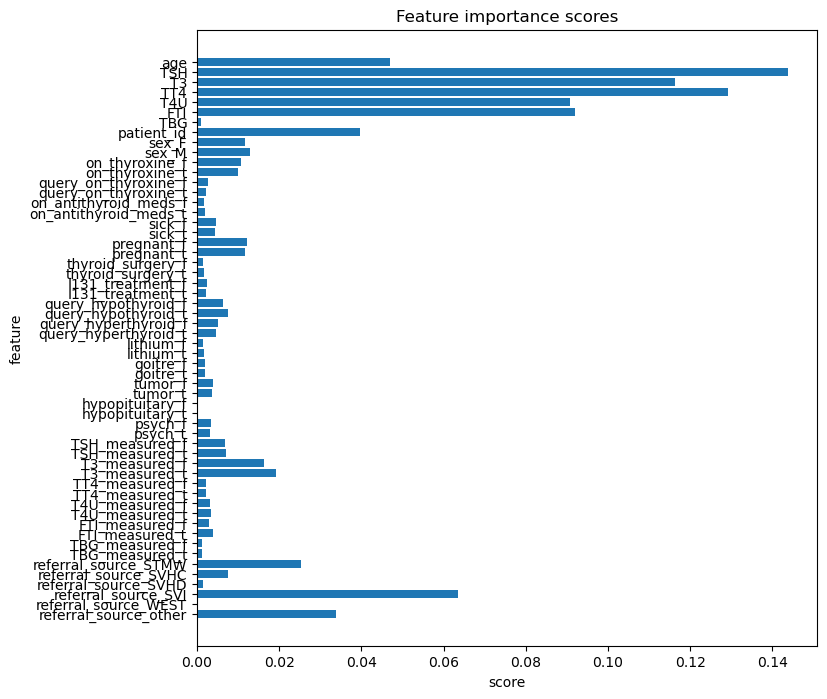

In [614]:
#Feature importance graph
import matplotlib.pyplot as plt
feature_names = X.columns
feat_imp = etc.feature_importances_
plt.figure(figsize= (8,8))
plt.barh(feature_names, feat_imp)
plt.title('Feature importance scores')
plt.ylabel('feature')
plt.xlabel('score')
plt.gca().invert_yaxis()
plt.show()


**Identifying selected features & recreating model**   
- Selected features above threshold values are displayed  
- Model is trained and evaluated 

In [615]:
etc1 = SelectFromModel(RandomForestClassifier(n_estimators=200, max_depth=20, random_state=1), threshold=0.015) #running feature importance calculations
X_select = etc1.fit_transform(X, y)
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_select, y, test_size= 0.2, random_state= 1)

selected_feat1 = etc1.get_support()
selected_cols1 = X.columns[selected_feat1]
print (f' The selected features are {selected_cols1}')


 The selected features are Index(['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI', 'patient_id', 'T3_measured_f',
       'T3_measured_t', 'referral_source_SVI', 'referral_source_other'],
      dtype='object')


In [616]:
# training model on selected features 
mod_v1 = RandomForestClassifier(n_estimators=200, max_depth=20) #model with selected MLFS features
mod_v1.fit(X_train1, y_train1)
print (f'Performance of original model is : {mod_v1.score(X_test1, y_test1)}')
y_pred1 = mod_v1.predict(X_test1)

Performance of original model is : 0.9774647887323944


**Implementing 10-Fold Cross Validation**
- Importing relevant modules (Kfold and metrics)
- Creating 10 data splits with random selection  
- Tracking accuracy and recall scores for each fold  
- Calculating mean accuracy and recall with Std. deviation across folds   
- Plotting graphs of accuracy and recall scores for each fold  

In [617]:
#Using 10 fold CV
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import accuracy_score, recall_score
kf = KFold(n_splits=10, shuffle= True, random_state=1) #setting parameters for cros validation



In [618]:
import numpy as np
#Accuracy and Recall Scores of Original Model 
acc_scores = []
rec_scores = []
#initialising for loop to select training splits
for fold, (train_idx, test_idx) in enumerate(kf.split(X_select, y)): 
    X_train, X_test = X_select[train_idx], X_select[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    mod_v1.fit(X_train, y_train)
    y_pred = mod_v1.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    acc_scores.append(accuracy)

    recall = recall_score(y_test, y_pred, average= 'macro')
    rec_scores.append(recall)

    print (f'For fold {fold+1} - Accuracy :{accuracy:.4f}, Recall :{recall:.4f}')

mean_accuracy = sum(acc_scores)/ len(acc_scores)
mean_recall = sum(rec_scores)/ len(rec_scores)

std_accuracy = np.std(acc_scores)
std_recall = np.std(rec_scores)

print (f'Mean accuracy is :{mean_accuracy:.4f} and the standard deviation across folds is {std_accuracy:.4f}')
print (f'Mean recall is :{mean_recall:.4f} and the standard deviation across folds is {std_recall:.4f}')

For fold 1 - Accuracy :0.9663, Recall :0.9697
For fold 2 - Accuracy :0.9944, Recall :0.9947
For fold 3 - Accuracy :0.9831, Recall :0.9847
For fold 4 - Accuracy :0.9944, Recall :0.9944
For fold 5 - Accuracy :0.9718, Recall :0.9783
For fold 6 - Accuracy :0.9718, Recall :0.9745
For fold 7 - Accuracy :0.9774, Recall :0.9830
For fold 8 - Accuracy :0.9661, Recall :0.9676
For fold 9 - Accuracy :0.9831, Recall :0.9810
For fold 10 - Accuracy :0.9774, Recall :0.9769
Mean accuracy is :0.9786 and the standard deviation across folds is 0.0097
Mean recall is :0.9805 and the standard deviation across folds is 0.0087


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


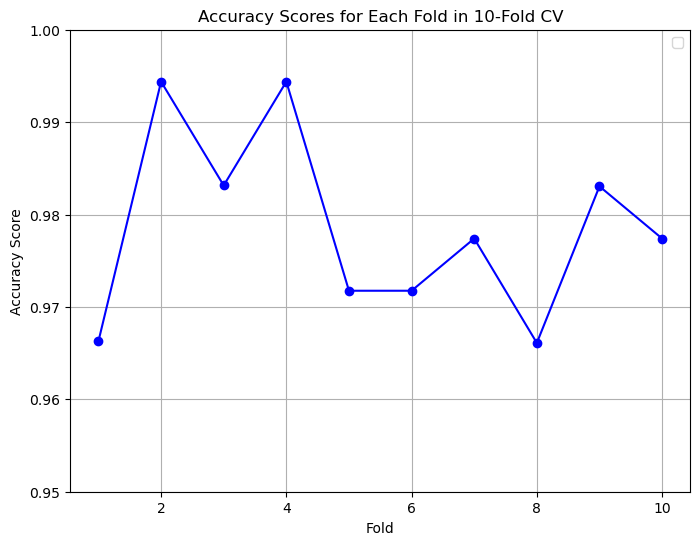

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


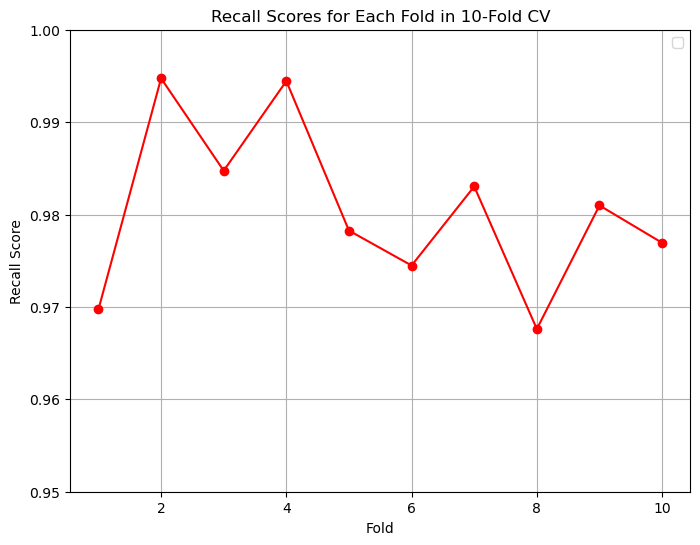

In [619]:
# Plotting accuracy scores
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), acc_scores, marker='o', linestyle='-', color='blue')
plt.title('Accuracy Scores for Each Fold in 10-Fold CV')
plt.xlabel('Fold')
plt.ylabel('Accuracy Score')
plt.ylim(0.95, 1)
plt.grid(True)
plt.legend()
plt.show()

# Plotting recall scores
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), rec_scores, marker='o', linestyle='-', color='red')
plt.title('Recall Scores for Each Fold in 10-Fold CV')
plt.xlabel('Fold')
plt.ylabel('Recall Score')
plt.ylim(0.95, 1)
plt.grid(True)
plt.legend()
plt.show()

**Heatmap to analyse class predictions**
- Import relevant libraries and modules (seaborn and confusion_matrix)  
- Create confusion matrix of true and predicted samples  
- Plot heatmap of target class predictions   

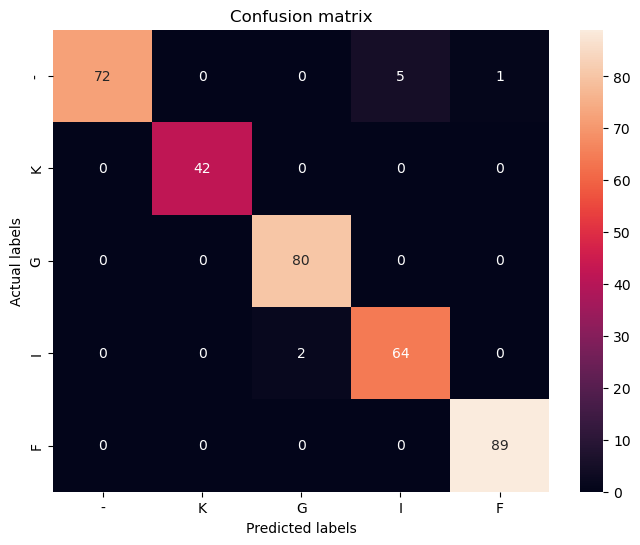

In [620]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test1, y_pred1)
plt.figure(figsize= (8,6))
heatmap = sns.heatmap(cm, annot= True, xticklabels= target_labels_org,
                      yticklabels= target_labels_org)
plt.xlabel('Predicted labels')
plt.ylabel('Actual labels')
plt.title('Confusion matrix')
plt.show()

**Using SMOTE to sample data**
- SMOTE (Synthetic minority sampling technique) was utlilised to increase target classes from 5 to 7
- Preprocessing sampled dataset to get relevant features and classes

In [621]:
#implementing SMOTE on data
from imblearn.over_sampling import SMOTE

# sampling 2 target classes above threshold value :{R, A}
smote = SMOTE(sampling_strategy= {'R':231 ,'A':231 ,'L':180, 'M':175}, k_neighbors= 5, n_jobs= -1, random_state= 1)
X = df.drop(columns = ['target'])
y = df['target']

X1 = pd.get_dummies(X, cols_encode) #one hot encoding cols
X1.fillna(-1, inplace= True) #filling empty values

print (f' Shape of dataset after encoding is {X1.shape} and target shape is {y.shape}')

 Shape of dataset after encoding is (9172, 56) and target shape is (9172,)


In [622]:
X_t, y_t = smote.fit_resample(X1,y) #applying smote and combining dataframes
df2 = pd.concat([pd.DataFrame(X_t), pd.DataFrame(y_t)], axis= 1) 
count3 = df2['target'].value_counts()

print (f' Increase in number of rows after sampling - shape :{df2.shape}')
print (f' Dataframe shape after smote {df2.shape}')
print (f' Value counts of all target classes after smote is \n{count3}')

 Increase in number of rows after sampling - shape :(9420, 57)
 Dataframe shape after smote (9420, 57)
 Value counts of all target classes after smote is 
-      6771
K       436
G       359
I       346
F       233
R       231
A       231
L       180
M       175
N       110
S        85
GK       49
AK       46
J        30
B        21
MK       16
Q        14
O        14
C|I      12
KJ       11
GI       10
H|K       8
D         8
FK        6
C         6
P         5
MI        2
LJ        1
GKJ       1
OI        1
D|R       1
E         1
Name: target, dtype: int64


/Users/doctorflu/anaconda3/lib/python3.11/site-packages/imblearn/over_sampling/_smote/base.py:336: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


In [623]:
count2 = count3[count3 > 230].index

indices2 = df2[df2['target'] == '-'].index
df_temp = df2.loc[rand_select(indices2)]

df_t1 = df2[df2['target'].isin(count2)]
df_t2 = df_t1[df_t1['target'] != '-']

c4 = df_t2['target'].value_counts()

print (df_temp['target'].value_counts())
print(f'Value counts of dataset is \n{c4}')

-    400
Name: target, dtype: int64
Value counts of dataset is 
K    436
G    359
I    346
F    233
R    231
A    231
Name: target, dtype: int64


In [624]:
df_t3 = pd.concat([df_temp, df_t2], axis= 0)
print(df_t3['target'].value_counts())
c5 = df_t3['target'].value_counts()

K    436
-    400
G    359
I    346
F    233
R    231
A    231
Name: target, dtype: int64


In [625]:
X2 = df_t3.drop('target', axis=1)
y2 = df_t3['target']

df_temp = pd.DataFrame(df_t3, columns= ['T3_measured_t'])

#using MLFS features and splitting data
X3 = etc1.fit_transform(X2, y2)
selected_feat = etc1.get_support()

X_t = pd.DataFrame(X3, columns= X2.columns[selected_feat])
X_t.reset_index(drop= True, inplace= True)
df_temp.reset_index(drop= True, inplace= True)
y2.reset_index(drop = True, inplace= True)

X4 = pd.concat([X_t, df_temp], axis= 1)
combined_data = pd.concat([X4, y2], axis= 1)

**Training model on sampled dataset**  
- Splitting dataset into training and testing splits   
- Evaluating model performance 

In [626]:
train_comb, test_comb = train_test_split(combined_data, test_size=0.2, random_state= 1)

train_comb.fillna(-1, inplace= True)

X_train2 = train_comb.drop('target', axis= 1)
y_train2 = train_comb['target']

selected_cols = X2.columns[selected_feat]
print (X_train2.shape)

(1788, 11)


In [627]:
#preprocessing testing dataset 
X_test2 = test_comb.drop(['target'], axis= 1)
y_test2 = test_comb['target']
unique = y_test2.value_counts()
print (f'Number of unique target labels in the testing dataset is \n{unique}')

Number of unique target labels in the testing dataset is 
K    98
G    82
I    70
-    67
F    55
R    41
A    35
Name: target, dtype: int64


In [628]:
#training the model on original + sampled data
mod_v2 = RandomForestClassifier(n_estimators=200, max_depth= 20)
mod_v2.fit(X_train2, y_train2)
score_smote = mod_v2.score(X_test2, y_test2) 
y_pred2 = mod_v2.predict(X_test2)
print(score_smote)

0.96875


**Heatmap to analyse class predictions on sampled data model**
- Create confusion matrix of true and predicted samples  
- Plot heatmap of target class predictions   

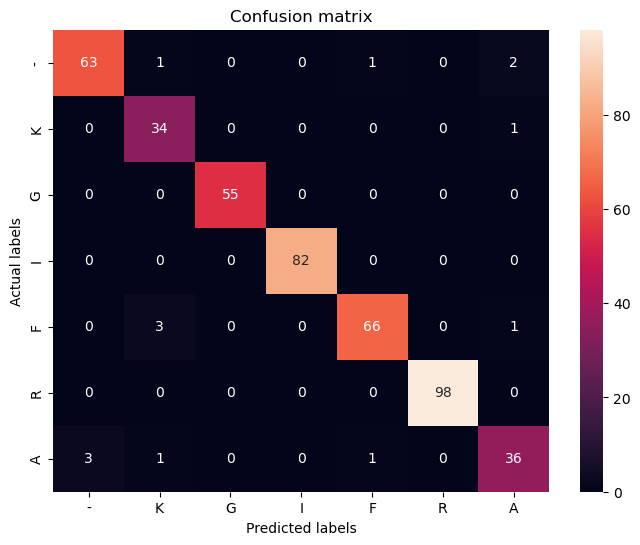

In [629]:
cm = confusion_matrix(y_test2, y_pred2)
plt.figure(figsize= (8,6))
heatmap = sns.heatmap(cm, annot= True, xticklabels= target_labels,
                      yticklabels= target_labels)
plt.xlabel('Predicted labels')
plt.ylabel('Actual labels')
plt.title('Confusion matrix')
plt.show()

**Implementing 10-Fold Cross Validation**
- Creating 10 data splits with random selection  
- Tracking accuracy and recall scores for each fold  
- Calculating mean accuracy and recall with Std. deviation across folds   
- Plotting graphs of accuracy and recall scores for each fold and comparing with mod_v1 


In [630]:
X_smote = combined_data.drop(['target'], axis= 1)
y_smote = combined_data['target']
print (X_smote.shape, y_smote.shape)

(2236, 11) (2236,)


In [631]:
acc_scores1 = []
rec_scores1 = []
#initialising for loop to select training splits
for fold, (train_idx, test_idx) in enumerate(kf.split(X_smote, y_smote)): 
    X_train, X_test = X_smote.iloc[train_idx], X_smote.iloc[test_idx]
    y_train, y_test = y_smote.iloc[train_idx], y_smote.iloc[test_idx]

    mod_v1.fit(X_train, y_train)
    y_pred = mod_v1.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    acc_scores1.append(accuracy)

    recall = recall_score(y_test, y_pred, average= 'macro')
    rec_scores1.append(recall)

    print (f'For fold {fold+1} - Accuracy :{accuracy:.4f}, Recall :{recall:.4f}')

mean_accuracy1 = sum(acc_scores1)/ len(acc_scores1)
mean_recall1 = sum(rec_scores1)/ len(rec_scores1)

std_accuracy1 = np.std(acc_scores1)
std_recall1 = np.std(rec_scores1)

print ('The k fold cross validation scores for the sampled dataset are' )
print (f'Mean accuracy is :{mean_accuracy1:.4f} and the standard deviation across folds is {std_accuracy1:.4f}')
print (f'Mean recall is :{mean_recall1:.4f} and the standard deviation across folds is {std_recall1:.4f}')

For fold 1 - Accuracy :0.9777, Recall :0.9671
For fold 2 - Accuracy :0.9732, Recall :0.9688
For fold 3 - Accuracy :0.9509, Recall :0.9546
For fold 4 - Accuracy :0.9643, Recall :0.9541
For fold 5 - Accuracy :0.9821, Recall :0.9846
For fold 6 - Accuracy :0.9598, Recall :0.9646
For fold 7 - Accuracy :0.9596, Recall :0.9570
For fold 8 - Accuracy :0.9596, Recall :0.9621
For fold 9 - Accuracy :0.9731, Recall :0.9750
For fold 10 - Accuracy :0.9283, Recall :0.9236
The k fold cross validation scores for the sampled dataset are
Mean accuracy is :0.9629 and the standard deviation across folds is 0.0148
Mean recall is :0.9611 and the standard deviation across folds is 0.0154


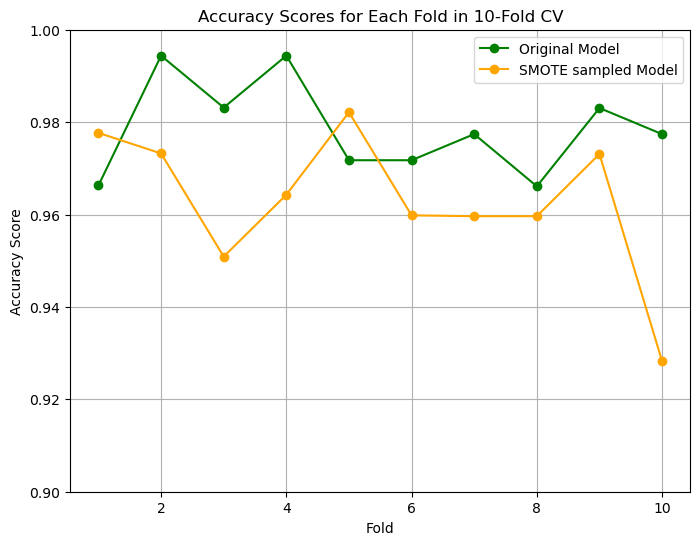

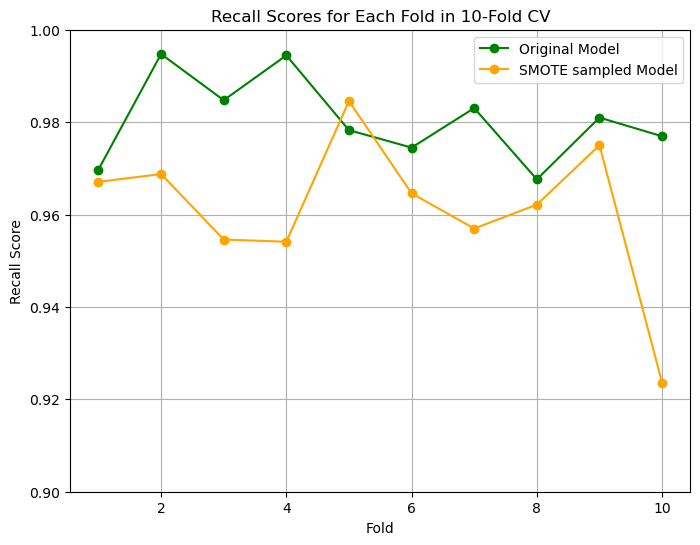

In [632]:
# Plotting accuracy scores
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), acc_scores, marker='o', linestyle='-', color='green', label= 'Original Model')
plt.plot(range(1, 11), acc_scores1, marker='o', linestyle='-', color='orange', label= 'SMOTE sampled Model')
plt.title('Accuracy Scores for Each Fold in 10-Fold CV')
plt.xlabel('Fold')
plt.ylabel('Accuracy Score')
plt.ylim(0.9, 1)
plt.grid(True)
plt.legend()
plt.show()

# Plotting recall scores
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), rec_scores, marker='o', linestyle='-', color='green', label= 'Original Model')
plt.plot(range(1, 11), rec_scores1, marker='o', linestyle='-', color='orange', label= 'SMOTE sampled Model')
plt.title('Recall Scores for Each Fold in 10-Fold CV')
plt.xlabel('Fold')
plt.ylabel('Recall Score')
plt.ylim(0.9, 1)
plt.grid(True)
plt.legend()
plt.show()

**Using Borderline SMOTE to view results with large oversampling data**    
- Create sampled dataset  
- Removing original datapoints from sampled dataset  


In [633]:
from imblearn.over_sampling import BorderlineSMOTE
b_smote = BorderlineSMOTE(sampling_strategy= 'auto', random_state=1, k_neighbors=5, m_neighbors=2)
X_b, y_b = b_smote.fit_resample(X1, y) #creating sampled dataframe
print (f'Shape of dataset before sampling : {X1.shape}, \n Shape of dataset after sampling : {X_b.shape}')
print (f'Sampled target class counts are \n {y_b.value_counts()}')

Shape of dataset before sampling : (9172, 56), 
 Shape of dataset after sampling : (121992, 56)
Sampled target class counts are 
 -      6771
K      6771
D      6771
H|K    6771
B      6771
S      6771
L      6771
FK     6771
A      6771
KJ     6771
G      6771
N      6771
M      6771
I      6771
R      6771
AK     6771
F      6771
GK     6771
J        30
MK       16
Q        14
O        14
C|I      12
GI       10
C         6
P         5
MI        2
LJ        1
GKJ       1
OI        1
D|R       1
E         1
Name: target, dtype: int64


In [634]:
#checking that original datapoints are starting index in sampled dataset
print (f'Original dataset \n{X1.head().to_string(index= False)}')
print (f'Sampled dataset \n{X_b.head().to_string(index= False)}')

Original dataset 
 age  TSH   T3   TT4  T4U  FTI  TBG  patient_id  sex_F  sex_M  on_thyroxine_f  on_thyroxine_t  query_on_thyroxine_f  query_on_thyroxine_t  on_antithyroid_meds_f  on_antithyroid_meds_t  sick_f  sick_t  pregnant_f  pregnant_t  thyroid_surgery_f  thyroid_surgery_t  I131_treatment_f  I131_treatment_t  query_hypothyroid_f  query_hypothyroid_t  query_hyperthyroid_f  query_hyperthyroid_t  lithium_f  lithium_t  goitre_f  goitre_t  tumor_f  tumor_t  hypopituitary_f  hypopituitary_t  psych_f  psych_t  TSH_measured_f  TSH_measured_t  T3_measured_f  T3_measured_t  TT4_measured_f  TT4_measured_t  T4U_measured_f  T4U_measured_t  FTI_measured_f  FTI_measured_t  TBG_measured_f  TBG_measured_t  referral_source_STMW  referral_source_SVHC  referral_source_SVHD  referral_source_SVI  referral_source_WEST  referral_source_other
  29  0.3 -1.0  -1.0 -1.0 -1.0 -1.0   840801013      1      0               1               0                     1                     0                      1    

In [635]:
X_b1 = X_b.drop(X_b.index[:9172])
y_b1 = y_b.drop(y_b.index[:9172])
df_b1 = pd.concat([X_b1, y_b1], axis= 1)
df_b1.head()


,age,TSH,T3,TT4,T4U,FTI,TBG,patient_id,sex_F,sex_M,on_thyroxine_f,on_thyroxine_t,query_on_thyroxine_f,query_on_thyroxine_t,on_antithyroid_meds_f,on_antithyroid_meds_t,sick_f,sick_t,pregnant_f,pregnant_t,thyroid_surgery_f,thyroid_surgery_t,I131_treatment_f,I131_treatment_t,query_hypothyroid_f,query_hypothyroid_t,query_hyperthyroid_f,query_hyperthyroid_t,lithium_f,lithium_t,goitre_f,goitre_t,tumor_f,tumor_t,hypopituitary_f,hypopituitary_t,psych_f,psych_t,TSH_measured_f,TSH_measured_t,T3_measured_f,T3_measured_t,TT4_measured_f,TT4_measured_t,T4U_measured_f,T4U_measured_t,FTI_measured_f,FTI_measured_t,TBG_measured_f,TBG_measured_t,referral_source_STMW,referral_source_SVHC,referral_source_SVHD,referral_source_SVI,referral_source_WEST,referral_source_other,target
9172,38,0.150000,4.526571,165.361630,0.980886,169.638370,-1.0,850412883,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,1,0,0,0,0,0,0,1,A
9173,47,0.081821,3.362930,198.810763,0.808159,244.724564,-1.0,861011120,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,0,0,1,0,1,0,1,1,0,0,0,0,0,0,0,A
9174,26,0.125697,2.872397,232.083625,0.865362,273.154285,-1.0,841102310,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0,0,0,0,1,0,1,0,1,1,0,0,0,0,0,0,1,A
9175,71,0.020000,-0.331156,157.777258,0.898665,175.510810,-1.0,851121179,0,0,1,0,1,0,1,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,0,0,1,0,1,0,1,1,0,0,0,0,0,0,0,A
9176,31,-0.876502,-0.404964,214.020876,0.814386,261.715376,-1.0,841017847,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,0,0,0,0,0,1,0,1,0,1,1,0,0,0,0,0,0,1,A


**Preprocessing data**  
- Removing target classes not to be used  
- Retaining only relevant features to avoid overfitting

In [636]:
#removing all samples with multiple diagnosis
df_b2 = df_b1[df_b1['target'].apply(lambda x: len(str(x)) ==1)]
df_b2 = df_b2[~df_b2['target'].isin(['D', 'B'])]
print (f'Dataset shape before filtering: {df_b1.shape},\nDataset shape after filtering: {df_b2.shape}')
print (df_b2['target'].value_counts())

Dataset shape before filtering: (112820, 57),
Dataset shape after filtering: (65572, 57)
S    6686
N    6661
M    6660
L    6656
A    6624
R    6575
F    6538
I    6425
G    6412
K    6335
Name: target, dtype: int64


In [637]:
#performing feature selection on the sampled dataset 
cols_etc = ['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI', 'patient_id', 'T3_measured_f',
       'T3_measured_t', 'referral_source_SVI', 'referral_source_other', 'target']
df_b3 = df_b2[cols_etc].copy() #extracted relevant features
print (df_b3.shape)

(65572, 12)


**Training mod_v3 and creating testing dataset**
- Training using same algorithm (RFC)
- Using original datapoints as the test set 
- Retaining only relevant target labels

In [638]:
#training dataset on RFC
X_train3 = df_b3.drop(['target'], axis= 1)
y_train3 = df_b3['target']

mod_v3 = RandomForestClassifier(n_estimators=200, max_depth= 20)
mod_v3.fit(X_train3, y_train3)


RandomForestClassifier(max_depth=20, n_estimators=200)

In [639]:
#balancing original datapoints as testing dataset
df01 = pd.get_dummies(df00, columns= cols_encode)
df01.fillna(-1, inplace= True)
df_btest = df01[cols_etc].copy()
df_btest['target'].value_counts()

-      6771
K       436
G       359
I       346
F       233
R       196
A       147
L       115
M       111
N       110
S        85
GK       49
AK       46
J        30
B        21
MK       16
Q        14
O        14
C|I      12
KJ       11
GI       10
H|K       8
D         8
FK        6
C         6
P         5
MI        2
LJ        1
GKJ       1
OI        1
D|R       1
E         1
Name: target, dtype: int64

In [640]:
target_c1 = [ 'S', 'N', 'M', 'L', 'A', 'R', 'F', 'I', 'G', 'K']
df_btest1 = df_btest[df_btest['target'].isin(target_c1)]
df_btest1['target'].value_counts()

K    436
G    359
I    346
F    233
R    196
A    147
L    115
M    111
N    110
S     85
Name: target, dtype: int64

In [643]:
#testing model and computing performance
X_test3 = df_btest1.drop(['target'], axis= 1)
y_test3 = df_btest1['target']
y_pred3 = mod_v3.predict(X_test3)
score_bsmote = mod_v3.score(X_test3, y_test3)
print (score_bsmote)

0.8807296538821329


**Plotting heatmap to check predictions by class**  
- Confusion matrix is plotted  
- Heatmap is generated for mod_v3  

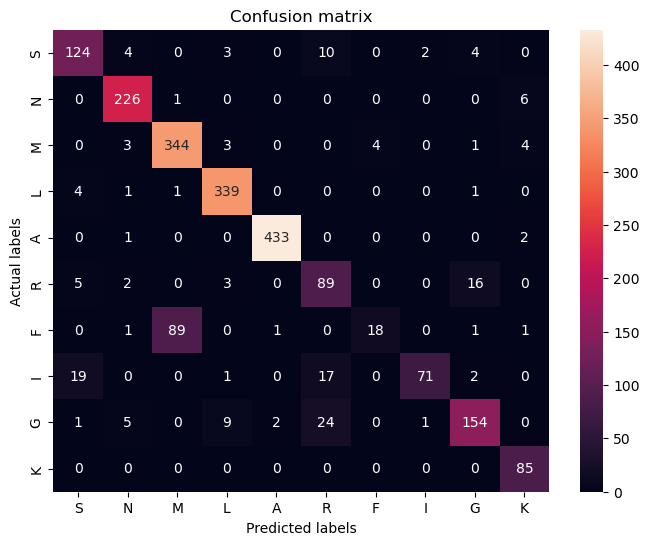

In [642]:
#heatmap to show predictions
cm = confusion_matrix(y_test3, y_pred3)
plt.figure(figsize= (8,6))
heatmap = sns.heatmap(cm, annot= True, xticklabels= target_c1,
                      yticklabels= target_c1, fmt= 'd')
plt.xlabel('Predicted labels')
plt.ylabel('Actual labels')
plt.title('Confusion matrix')
plt.show()